# Evaluating diamond prices with regression

### We will explore the factors that affect the price of diamonds. For this purpose we will use a dataset containing diamond prices, along with their various characteristics.

* The example is based on chapter 24 of Hadley Wickham and Garrette Grolemund's book, [R for Data Science](https://r4ds.had.co.nz/).

In [20]:
import numpy as np
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

from plotnine.data import diamonds

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


* Let's start with cut quality versus price by making a series of *boxplots*.

* The boxplot shows us:

 * the median

 * the 25% and 75% percentage

 * the range of values ​​lying 1.5 times above or below the case (whiskers)

 * outliers.

* It seems that, curiously, the better the cut, the lower the price.

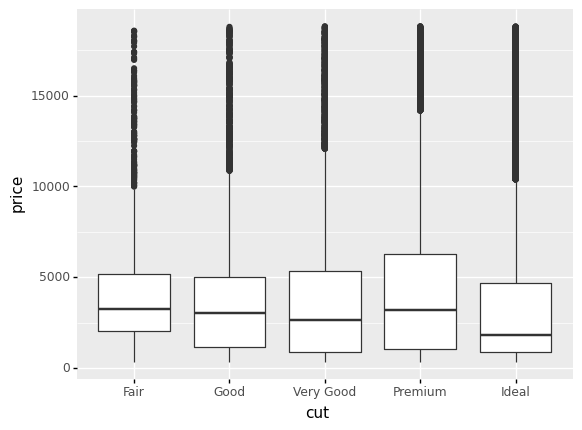

<ggplot: (324424924)>

In [33]:
ggplot(diamonds, aes(x='cut', y='price')) + geom_boxplot()

* Same diagram as seaborn:

<AxesSubplot:xlabel='cut', ylabel='price'>

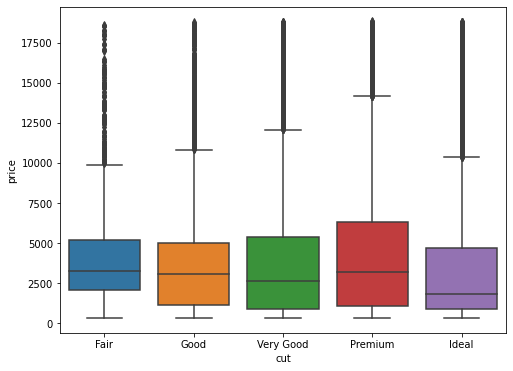

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cut', y='price', data=diamonds)

* In diamonds, the less color there is in the gem, the better its quality is rated.

* Colors are described on a letter scale from D to J, with D being the best (colorless) and the letters progressing as the presence of color in the gem increases.

* It seems again, paradoxically, that lower quality diamonds, at least according to the presence of color, command higher prices.

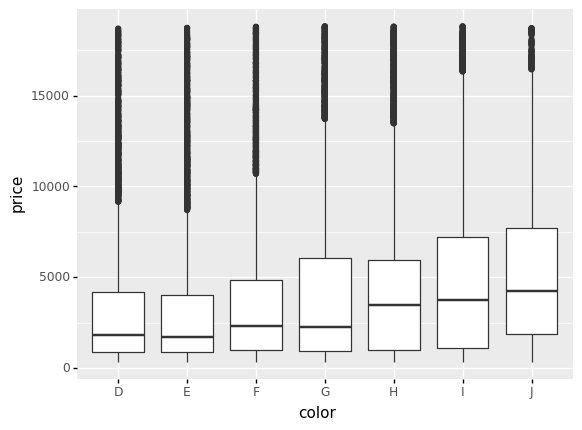

<ggplot: (324553846)>

In [35]:
ggplot(diamonds, aes(x='color', y='price')) + geom_boxplot()

* With seaborn:

<AxesSubplot:xlabel='color', ylabel='price'>

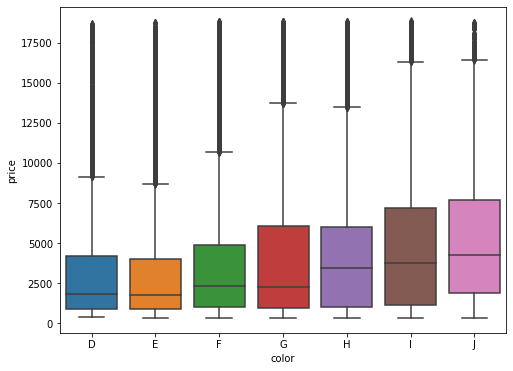

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='price', data=diamonds)

* Another characteristic valued in diamonds is their clarity.

* The scale is from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best).

* Again, higher purity corresponds to lower values.

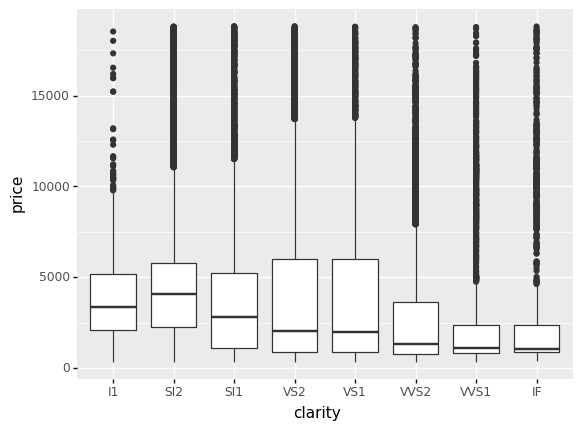

<ggplot: (324029877)>

In [37]:
ggplot(diamonds, aes(x='clarity', y='price')) + geom_boxplot()

* With seaborn:

<AxesSubplot:xlabel='clarity', ylabel='price'>

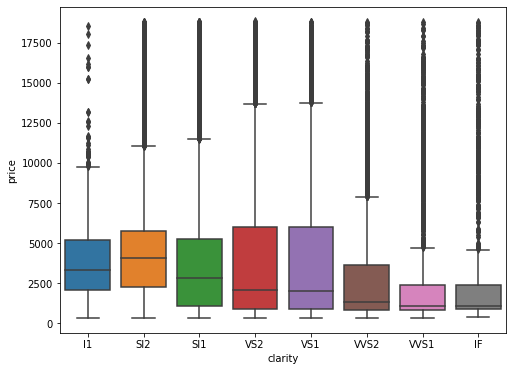

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='clarity', y='price', data=diamonds)

* The above findings can be explained if we consider that the `carat' variable is a *confounding factor*.

* The carat value, which corresponds to the weight, can be a very important factor in the price of the diamond, and we have not taken it into account.

* We can explore the relationship between the two with a hexbin diagram, or perhaps better *cell diagram*.

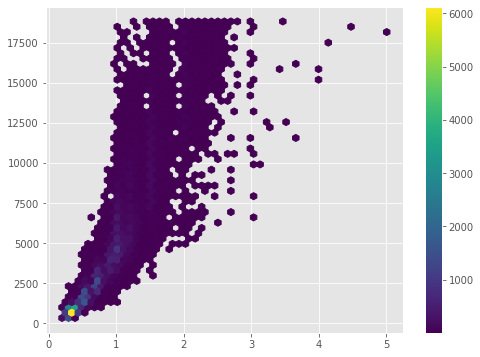

In [13]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds['carat'], y=diamonds['price'], gridsize=50, mincnt=1)
fig.colorbar(hb)

* We see that most diamonds weigh less than 2.5 carats.

* so we will turn our attention to them. We will also take the logarithms of the variables and see if any relationship emerges.

* In computing, we often use the base-two logarithm, denoted by $\lg(x)$.

* The base2-logarithm also has the advantage of being easy to interpret, as we will see next.

In [16]:
diamonds_log2 = diamonds.query('carat <= 2.5').sort_values(by='carat').copy()
diamonds_log2['price'] = np.log2(diamonds_log2['price'])
diamonds_log2['carat'] = np.log2(diamonds_log2['carat'])

* Now the hexagon plot clearly shows a linear relationship.

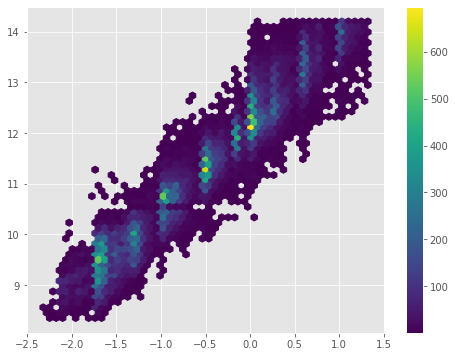

In [17]:
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], gridsize=50, mincnt=1)
fig.colorbar(hb)

* So we can run a linear regression on our logarithmic data.

* We will see that we get a very good $R^2$.

In [42]:
diamonds_mod = smf.ols("price ~ carat", data=diamonds_log2)
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:53:36   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1939      0.002   6194.469      0.000      12.190      12.198
carat          1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We don't actually need to logarithmize before building our model.

* We can define the logarithm inside the model type. The result is exactly the same.

In [21]:
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)", 
                       data=diamonds.query('carat <= 2.5'))
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:42:24   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.1939      0.002   6194.469      0.000      12.190      12.198
np.log2(carat)     1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Regression results show that:

$$ \lg(\mathrm{price}) = 12{,}1939 + 1{,}6814\lg(\mathrm{carat}) $$

* The logarithm of the price of a diamond whose logarithm weight is zero, $\lg(\mathrm{carat}) = 0$, i.e. $\mathrm{carat} = 1$, will be $12{,}1939$.

* So the price of this diamond will be $2^{12{,}1939} \approx \$4700$.

* For every unit that the logarithm of weight $\lg(\mathrm{carat})$ increases, the logarithm of the diamond price increases by $1{,}6814$.

* So, every time the weight doubles, the price of the diamond is multiplied by $2^{1{,}6814}$.

* Removing the logarithms, the relationship becomes:

$$ \mathrm{price} = 2^{12{,}1939} \times \mathrm{carat}^{1{,}6814} $$

* The ordinate and slope we found define a straight line that cuts through the data exactly in the middle.

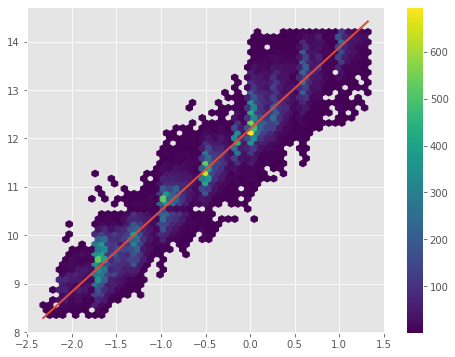

In [22]:
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], gridsize=50, mincnt=1)
x = diamonds_log2['carat']
y = diamonds_res.params['Intercept'] + diamonds_res.params['np.log2(carat)'] * diamonds_log2['carat']
plt.plot(x, y, linewidth=2)
fig.colorbar(hb)

* By exponentiating to remove the logarithms, we can make the corresponding plot on our original, non-logarithmic scale.

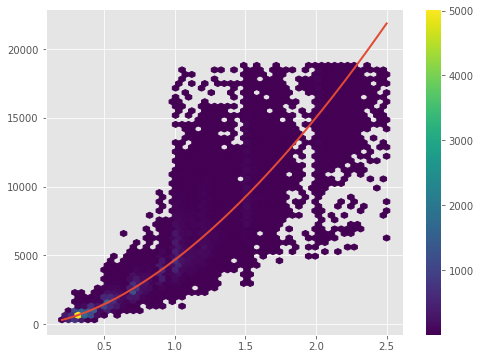

In [23]:
fig = plt.figure(figsize=(8, 6))
x = 2**diamonds_log2['carat']
y = 2**diamonds_log2['price']
hb = plt.hexbin(x=x, y=y, gridsize=50, mincnt=1)
y = 2**(diamonds_res.params['Intercept'] + (diamonds_res.params['np.log2(carat)'] * diamonds_log2['carat']))
plt.plot(x, y, linewidth=2)
fig.colorbar(hb)

* We can check the quality of the regression with the residual plot.

* First, with ggplot.

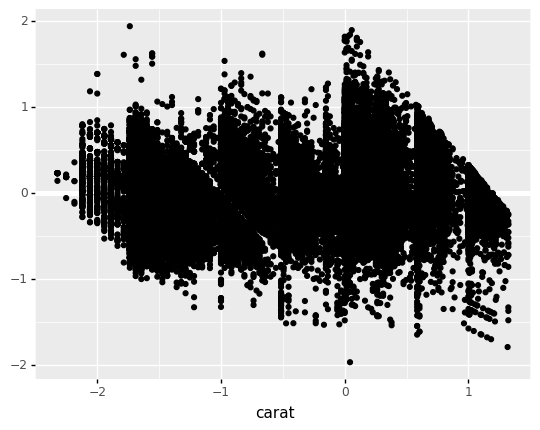

<ggplot: (324888001)>

In [46]:
ggplot(data=diamonds_log2) +\
    geom_hline(yintercept=0, color='white', size=2) +\
    geom_point(mapping=aes(x='carat', y=diamonds_res.resid))

* And with seaborn, directly (we give it the data and it runs the regression itself).

<AxesSubplot:xlabel='carat', ylabel='price'>

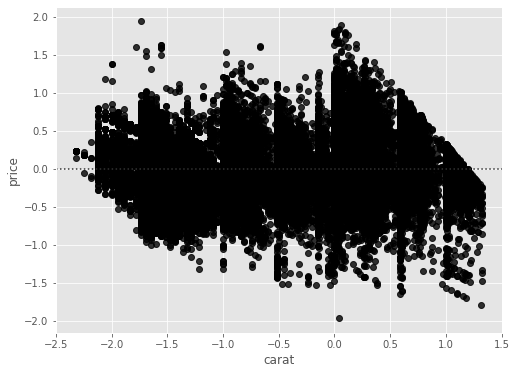

In [47]:
plt.figure(figsize=(8, 6))
sns.residplot(x='carat', y='price', data=diamonds_log2, color='k')

* Let us return to the original paradoxes.

* We can now make histograms with the *rests* and factors we considered at the beginning.

* Remember that the residuals represent what was not predicted, so not explained by the independent variable.

* So, in our case the remainder represents the part of the diamond's price that cannot be explained by its weight.

* So we will now expect to see the rest of the price increase with cut quality.

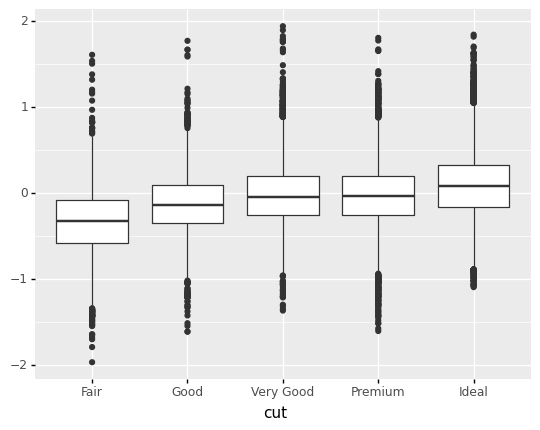

<ggplot: (325110501)>

In [48]:
ggplot(data=diamonds_log2, mapping=aes('cut', diamonds_res.resid)) + geom_boxplot()

* With seaborn:

<AxesSubplot:xlabel='cut'>

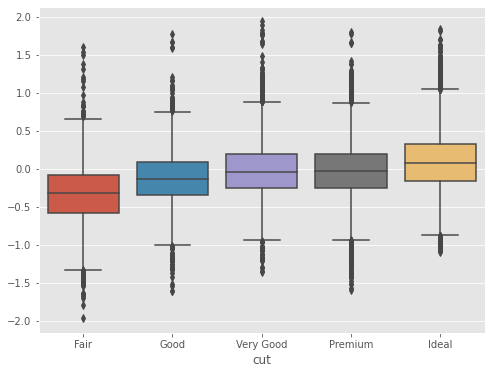

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['cut'], y=diamonds_res.resid)

* The rest of the price decreases as the color increases (worse quality).

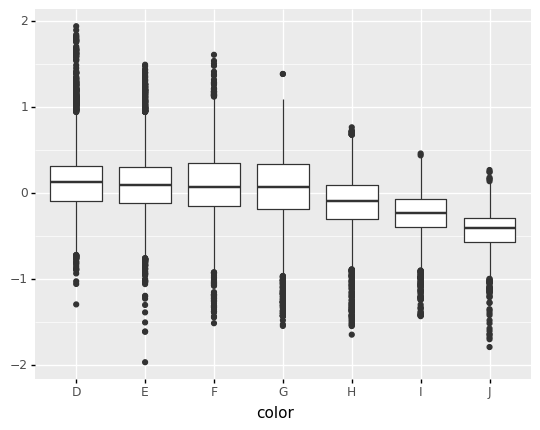

<ggplot: (324303367)>

In [50]:
ggplot(data=diamonds_log2, mapping=aes('color', diamonds_res.resid)) + geom_boxplot()

* Με το seaborn:

<AxesSubplot:xlabel='color'>

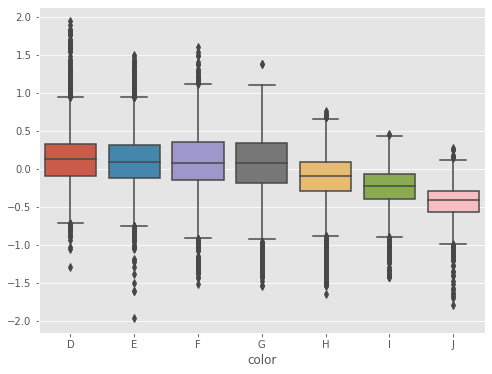

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['color'], y=diamonds_res.resid)

* The rest of the price increases as the clarity of the diamond increases.

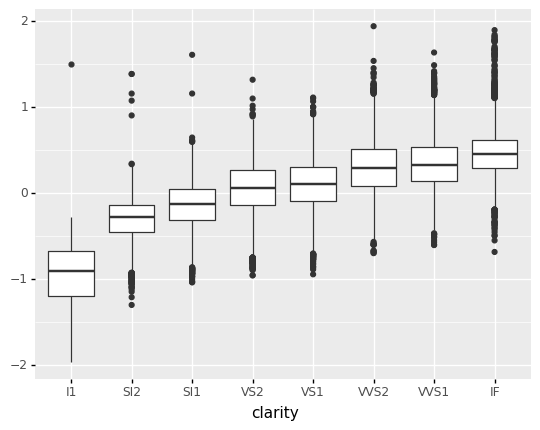

<ggplot: (324014894)>

In [52]:
ggplot(data=diamonds_log2, mapping=aes('clarity', diamonds_res.resid)) + geom_boxplot()

* With seaborn:

<AxesSubplot:xlabel='clarity'>

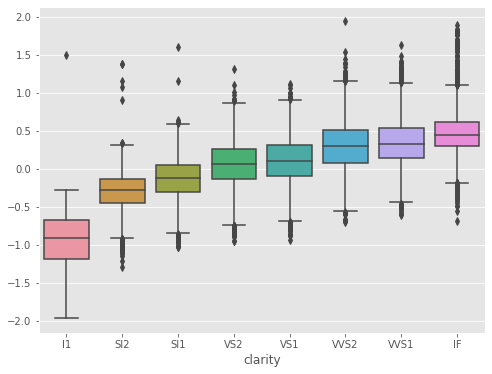

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['clarity'], y=diamonds_res.resid)

### With linear regression we can also handle data that does not seem to have a linear relationship with each other, by applying the appropriate mathematical function.

* This happens when we have an exponential relationship, which by using logarithms we can convert into a linear one.

* In statsmodels the formulas we give can contain mathematical functions, and not just lists of dependent variables.

* Be careful with the interpretation of the model!